# Clickbait Identification using Advanced Classification Techniques


## Objectives of the project


*   To study the inherent nature of clickbait and non-clickbait data and draw important distinguishing features statistically

*  To apply different classification techniques to the data and evaluate them on common metrics



*   To study the efficacy of the best model by validating it against current data.

## Data Source
This dataset was curated by Abhijnan Chakraborty, Bhargavi Paranjape, Sourya Kakarla, and Niloy Ganguly from IIT Kharagpur. 
https://github.com/bhargaviparanjape/clickbait/tree/master/dataset

### Main Paper referred:
https://arxiv.org/pdf/1610.09786.pdf








 






# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, GaussianNB
import statsmodels.api as sm
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import pydotplus
from IPython.display import Image 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
import string

## Reading data files and preparing the dataframe

In [4]:
def get_data():
    clickbait_data = []
    non_clickbait_data = []
    with open('clickbait_data',encoding="latin-1") as f:
        clickbait_data.append(f.read())

    with open('non_clickbait_data', encoding="latin-1") as f:
        non_clickbait_data.append(f.read())
 
    return clickbait_data, non_clickbait_data


In [5]:
clickbait_data, non_clickbait_data = get_data()

In [6]:
split_cb = clickbait_data[0].split('\n\n')
split_cb

['Should I Get Bings',
 'Which TV Female Friend Group Do You Belong In',
 'The New "Star Wars: The Force Awakens" Trailer Is Here To Give You Chills',
 'This Vine Of New York On "Celebrity Big Brother" Is Fucking Perfect',
 'A Couple Did A Stunning Photo Shoot With Their Baby After Learning She Had An Inoperable Brain Tumor',
 'How To Flirt With Queer Girls Without Making A Total Fool Of Yourself',
 '32 Cute Things To Distract From Your Awkward Thanksgiving',
 'If Disney Princesses Were From Florida',
 "What's A Quote Or Lyric That Best Describes Your Depression",
 'Natalie Dormer And Sam Claflin Play A Game To See How They\'d Actually Last In "The Hunger Games"',
 '16 Perfect Responses To The Indian Patriarchy',
 '21 Times I Died During The "Captain America: Civil War" Teaser',
 '17 Times Kourtney Kardashian Shut Down Her Own Family',
 'Does Coffee Make You Poop',
 'Who Is Your Celebrity Ex Based On Your Zodiac',
 '17 Hairdresser Struggles Every Black Girl Knows To Be True',
 'Are You

In [7]:
target = ["clickbait" for i in range(len(split_cb))]
split_cb_df = pd.DataFrame(list(zip(split_cb,target)), columns=["Text Data", "Target"])
split_cb_df

Text Data     Target
0                                     Should I Get Bings  clickbait
1          Which TV Female Friend Group Do You Belong In  clickbait
2      The New "Star Wars: The Force Awakens" Trailer...  clickbait
3      This Vine Of New York On "Celebrity Big Brothe...  clickbait
4      A Couple Did A Stunning Photo Shoot With Their...  clickbait
...                                                  ...        ...
15994  There Was A Mini "Sisterhood Of The Traveling ...  clickbait
15995    21 Dogs Who Are Thankful For Their Best Friends  clickbait
15996  People Are Proving No Dick Is Too Big By Dropp...  clickbait
15997                        I'm An Atheist, But I'm Not  clickbait
15998  An Artist Drew Disney Men As Justin Bieber And...  clickbait

[15999 rows x 2 columns]

In [8]:
split_ncb = non_clickbait_data[0].split('\n')
split_ncb

['Bill Changing Credit Card Rules Is Sent to Obama With Gun Measure Included',
 'In Hollywood, the Easy-Money Generation Toughens Up',
 "1700 runners still unaccounted for in UK's Lake District following flood",
 '',
 'Yankees Pitchers Trade Fielding Drills for Putting Practice',
 'Large earthquake rattles Indonesia; Seventh in two days',
 '',
 "Coldplay's new album hits stores worldwide this week",
 '',
 'U.N. Leader Presses Sri Lanka on Speeding Relief to War Refugees in Camps',
 '2 Somali-Americans Charged With Aiding Terror',
 "US Highway Administration releases interim report on Boston's Big Dig: press release claims tunnel safe, but report does not",
 '',
 'White House Announces International Meetings to Address Energy and Climate Issues',
 'With Troubled Coyotes, Gretzky Called On as Savior Again',
 'Door opens mid-Qantas flight; plane makes an emergency landing',
 '',
 'Gas prices surge in Northeast US',
 '',
 'Schapelle Corby found guilty, sentenced to 20 years',
 '',
 '2008 S

In [9]:
target = ["non_clickbait" for i in range(len(split_ncb))]
split_ncb_df = pd.DataFrame(list(zip(split_ncb,target)), columns=["Text Data", "Target"])
split_ncb_df

Text Data         Target
0      Bill Changing Credit Card Rules Is Sent to Oba...  non_clickbait
1      In Hollywood, the Easy-Money Generation Toughe...  non_clickbait
2      1700 runners still unaccounted for in UK's Lak...  non_clickbait
3                                                         non_clickbait
4      Yankees Pitchers Trade Fielding Drills for Put...  non_clickbait
...                                                  ...            ...
25996                                                     non_clickbait
25997  Drone smartphone app to help heart attack vict...  non_clickbait
25998                                                     non_clickbait
25999  Netanyahu Urges Pope Benedict, in Israel, to D...  non_clickbait
26000  Computer Makers Prepare to Stake Bigger Claim ...  non_clickbait

[26001 rows x 2 columns]

#### Some rows in non-clickbait dataframe are null. 

In [10]:
split_ncb_df[split_ncb_df["Text Data"] == ""]

Text Data         Target
3                non_clickbait
6                non_clickbait
8                non_clickbait
12               non_clickbait
16               non_clickbait
...         ...            ...
25989            non_clickbait
25991            non_clickbait
25993            non_clickbait
25996            non_clickbait
25998            non_clickbait

[10000 rows x 2 columns]

In [11]:
# Replace the text where it is blank with NaNs
split_ncb_df['Text Data'].replace('', np.nan, inplace=True)
split_ncb_df.head()

Text Data         Target
0  Bill Changing Credit Card Rules Is Sent to Oba...  non_clickbait
1  In Hollywood, the Easy-Money Generation Toughe...  non_clickbait
2  1700 runners still unaccounted for in UK's Lak...  non_clickbait
3                                                NaN  non_clickbait
4  Yankees Pitchers Trade Fielding Drills for Put...  non_clickbait

In [12]:
split_ncb_df.dropna(subset=['Text Data'], inplace=True)
split_ncb_df.head()

Text Data         Target
0  Bill Changing Credit Card Rules Is Sent to Oba...  non_clickbait
1  In Hollywood, the Easy-Money Generation Toughe...  non_clickbait
2  1700 runners still unaccounted for in UK's Lak...  non_clickbait
4  Yankees Pitchers Trade Fielding Drills for Put...  non_clickbait
5  Large earthquake rattles Indonesia; Seventh in...  non_clickbait

In [13]:
split_cb_df["Text Data"].apply(lambda x : len(x)).sort_values()

14198      6
13026      8
2424      10
13074     11
12159     11
        ... 
1131     114
2022     115
5231     117
7230     120
11513    125
Name: Text Data, Length: 15999, dtype: int64

In [14]:
split_ncb_df["Text Data"].apply(lambda x : len(x)).sort_values()

12807     11
25769     13
20383     15
22165     16
9771      16
        ... 
21590    126
1570     127
21972    130
24799    134
17617    135
Name: Text Data, Length: 16001, dtype: int64

In [15]:
df = pd.concat((split_cb_df, split_ncb_df), axis=0, ignore_index = True)
df.head()

Text Data     Target
0                                 Should I Get Bings  clickbait
1      Which TV Female Friend Group Do You Belong In  clickbait
2  The New "Star Wars: The Force Awakens" Trailer...  clickbait
3  This Vine Of New York On "Celebrity Big Brothe...  clickbait
4  A Couple Did A Stunning Photo Shoot With Their...  clickbait

## EDA

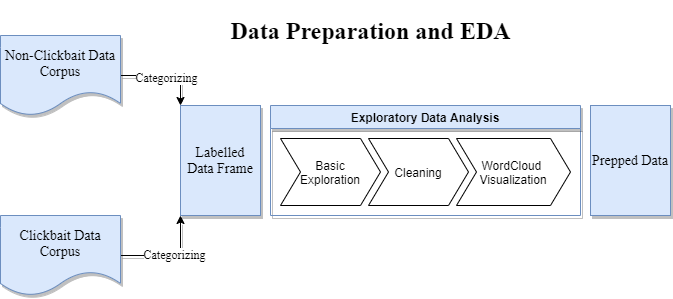



### Shape of the dataset

In [16]:
df.shape

(32000, 2)

### Null Values

In [17]:
df['Text Data'].isnull().sum()

0

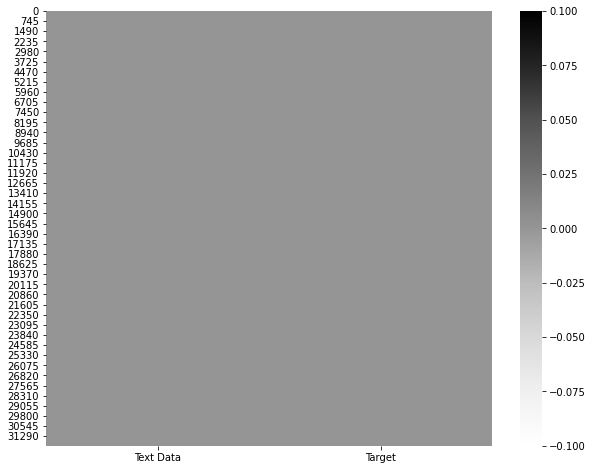

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.isnull(),cmap='Greys')
plt.show()

### Cleaning - Converting all to lower case

In [19]:
# We create a copy of df for all eda to follow
df_eda = df.copy()
df_eda.head()

Text Data     Target
0                                 Should I Get Bings  clickbait
1      Which TV Female Friend Group Do You Belong In  clickbait
2  The New "Star Wars: The Force Awakens" Trailer...  clickbait
3  This Vine Of New York On "Celebrity Big Brothe...  clickbait
4  A Couple Did A Stunning Photo Shoot With Their...  clickbait

In [20]:
df_eda.tail()

Text Data         Target
31995  To Make Female Hearts Flutter in Iraq, Throw a...  non_clickbait
31996  British Liberal Democrat Patsy Calton, 56, die...  non_clickbait
31997  Drone smartphone app to help heart attack vict...  non_clickbait
31998  Netanyahu Urges Pope Benedict, in Israel, to D...  non_clickbait
31999  Computer Makers Prepare to Stake Bigger Claim ...  non_clickbait

In [21]:
df_eda['Text Data']= df_eda['Text Data'].str.lower()
df_eda.head()

Text Data     Target
0                                 should i get bings  clickbait
1      which tv female friend group do you belong in  clickbait
2  the new "star wars: the force awakens" trailer...  clickbait
3  this vine of new york on "celebrity big brothe...  clickbait
4  a couple did a stunning photo shoot with their...  clickbait

### Wordcloud visualization

### CLICKBAIT DATA
### Removing all spaces 

In [22]:
all_text_cb= df_eda[df_eda["Target"] == "clickbait"]['Text Data'].str.split(' ')
all_text_cb.head()

0                              [should, i, get, bings]
1    [which, tv, female, friend, group, do, you, be...
2    [the, new, "star, wars:, the, force, awakens",...
3    [this, vine, of, new, york, on, "celebrity, bi...
4    [a, couple, did, a, stunning, photo, shoot, wi...
Name: Text Data, dtype: object

In [23]:
all_cb_text_cleaned = []

for text in all_text_cb:
    text = [x.strip(string.punctuation) for x in text]
    all_cb_text_cleaned.append(text)

#all_cb_text_cleaned[0]

cb_text_cleaned = [" ".join(text) for text in all_cb_text_cleaned]
final_cb_text = " ".join(cb_text_cleaned)
final_cb_text

'should i get bings which tv female friend group do you belong in the new star wars the force awakens trailer is here to give you chills this vine of new york on celebrity big brother is fucking perfect a couple did a stunning photo shoot with their baby after learning she had an inoperable brain tumor how to flirt with queer girls without making a total fool of yourself 32 cute things to distract from your awkward thanksgiving if disney princesses were from florida what\'s a quote or lyric that best describes your depression natalie dormer and sam claflin play a game to see how they\'d actually last in the hunger games 16 perfect responses to the indian patriarchy 21 times i died during the captain america civil war teaser 17 times kourtney kardashian shut down her own family does coffee make you poop who is your celebrity ex based on your zodiac 17 hairdresser struggles every black girl knows to be true are you more walter white or heisenberg the most canadian groom ever left his wed

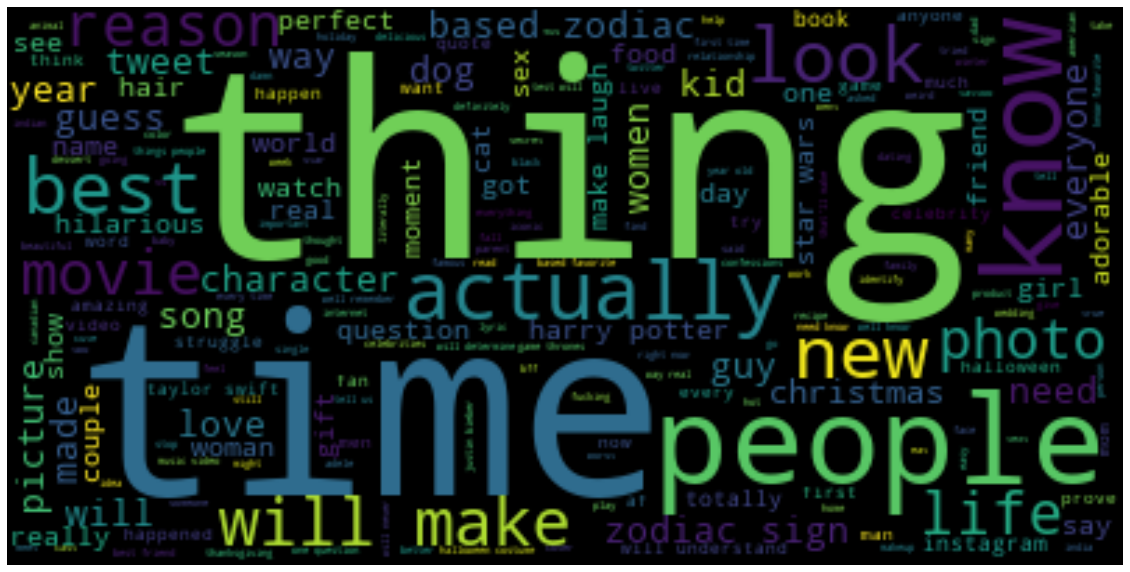

In [24]:
wordcloud_cb = WordCloud(background_color="black").generate(final_cb_text)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_cb, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
all_text_ncb= df_eda[df_eda["Target"] == "non_clickbait"]['Text Data'].str.split(' ')
all_text_ncb.head()

15999    [bill, changing, credit, card, rules, is, sent...
16000    [in, hollywood,, the, easy-money, generation, ...
16001    [1700, runners, still, unaccounted, for, in, u...
16002    [yankees, pitchers, trade, fielding, drills, f...
16003    [large, earthquake, rattles, indonesia;, seven...
Name: Text Data, dtype: object

In [26]:
all_ncb_text_cleaned = []

for text in all_text_ncb:
    text = [x.strip(string.punctuation) for x in text]
    all_ncb_text_cleaned.append(text)

#all_cb_text_cleaned[0]

ncb_text_cleaned = [" ".join(text) for text in all_ncb_text_cleaned]
final_ncb_text = " ".join(ncb_text_cleaned)
final_ncb_text

"bill changing credit card rules is sent to obama with gun measure included in hollywood the easy-money generation toughens up 1700 runners still unaccounted for in uk's lake district following flood yankees pitchers trade fielding drills for putting practice large earthquake rattles indonesia seventh in two days coldplay's new album hits stores worldwide this week u.n leader presses sri lanka on speeding relief to war refugees in camps 2 somali-americans charged with aiding terror us highway administration releases interim report on boston's big dig press release claims tunnel safe but report does not white house announces international meetings to address energy and climate issues with troubled coyotes gretzky called on as savior again door opens mid-qantas flight plane makes an emergency landing gas prices surge in northeast us schapelle corby found guilty sentenced to 20 years 2008 secutech expo starts in taipei taiwan for grasping global security industry new year introduces illin

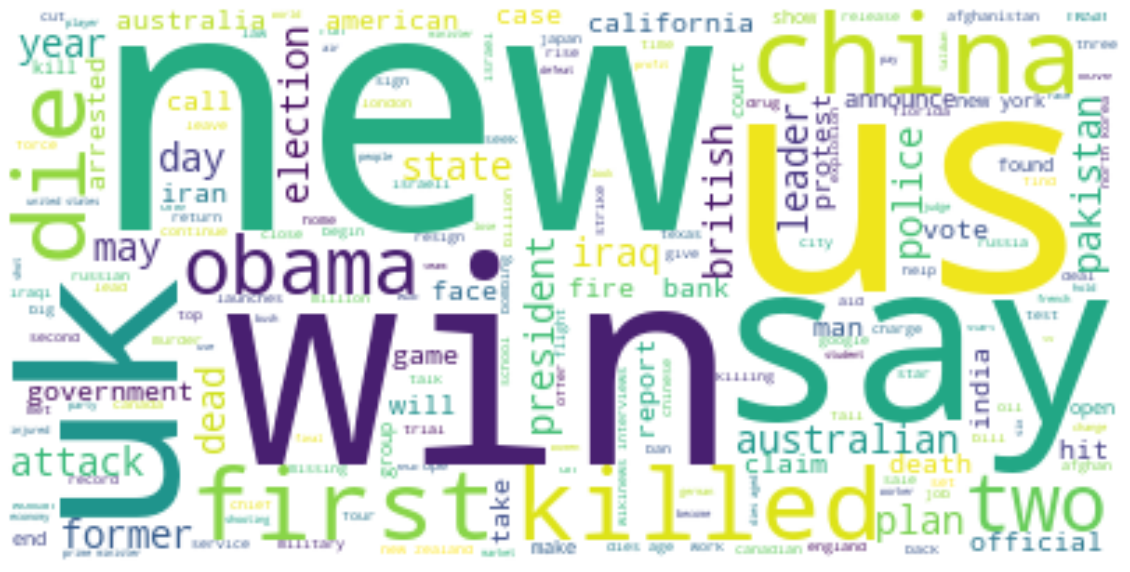

In [27]:
wordcloud_ncb = WordCloud(background_color="white").generate(final_ncb_text)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_ncb, interpolation='bilinear')
plt.axis("off")
plt.show()

### Distribution of the target

In [28]:
df.Target.value_counts()

non_clickbait    16001
clickbait        15999
Name: Target, dtype: int64

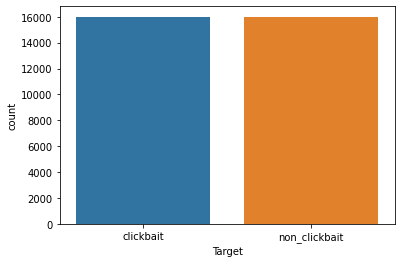

In [29]:
sns.countplot(x = df.Target)

Here, we see that the label of interest "clickbait" appears almost equal to "non-clickbait" data.

Clickbait - 15999
Non-Clickbait - 16001


# Feature Extraction

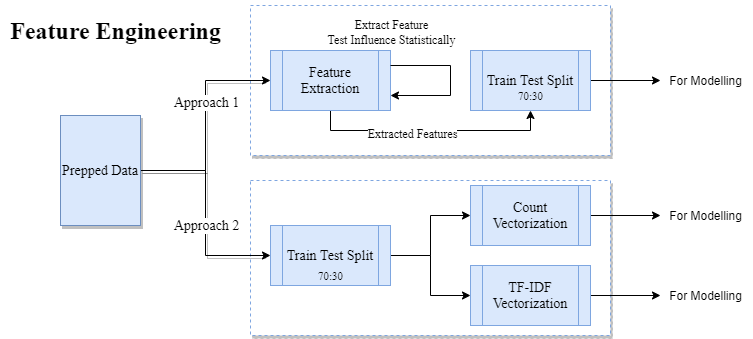

### Analysis on length of the text data

In [30]:
df_eda["Length"] = df_eda["Text Data"].apply(lambda x : len(x))
df_eda.head()

Text Data     Target  Length
0                                 should i get bings  clickbait      18
1      which tv female friend group do you belong in  clickbait      45
2  the new "star wars: the force awakens" trailer...  clickbait      73
3  this vine of new york on "celebrity big brothe...  clickbait      67
4  a couple did a stunning photo shoot with their...  clickbait     100

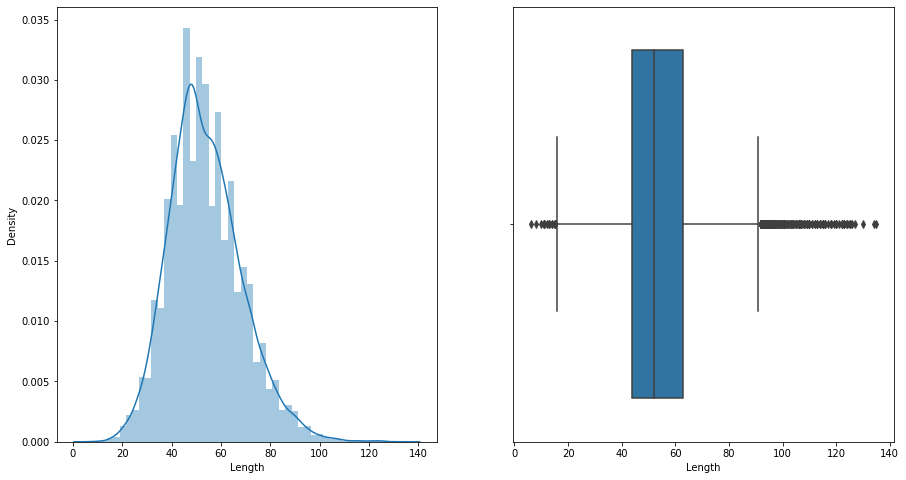

In [31]:
# Distribution of the lengths of the text
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.distplot(a = df_eda.Length)
plt.subplot(1,2,2)
sns.boxplot(x = df_eda.Length)

We see that distribution is slightly right skewed. There are also some outliers present. 
This means that there are some headlines that are longer than the others. 
There are certain outliers in the left side as well. This means that there are very short titles as well. 

#### Is there a discernible pattern here?

Mean length seems to be around 50-55. But, lot of the texts seem to have length more than 100. 

Let's now visualize the distribution for each target

#### Distribution of clickbait title lengths

Skewness of Clickbait title lengths:  0.18370561519775155


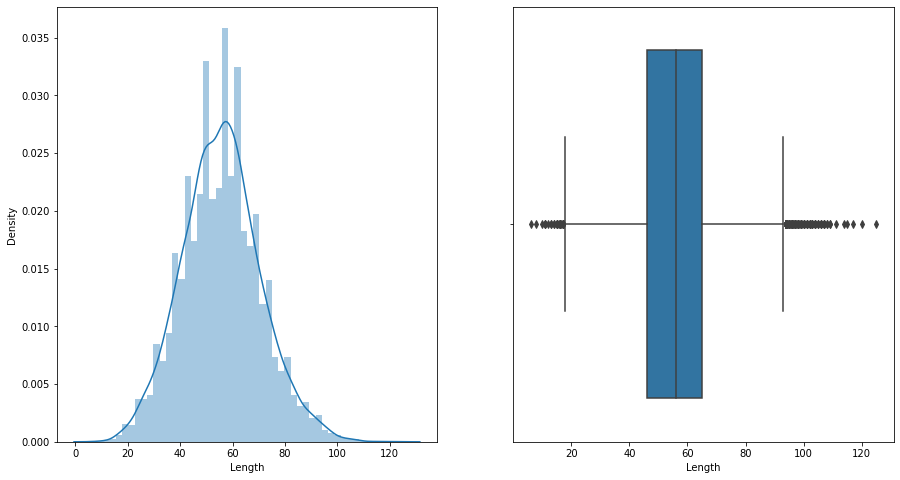

In [32]:
# Distribution of clickbait data

print("Skewness of Clickbait title lengths: ", df_eda[df_eda["Target"] == "clickbait"]["Length"].skew())
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df_eda[df_eda["Target"] == "clickbait"]["Length"])

plt.subplot(1,2,2)
sns.boxplot(df_eda[df_eda["Target"] == "clickbait"]["Length"])

We can clearly observe that the distribution is largely normal. There are some outliers on both sides, but largely, clickbait titles tend to have shorter titles. 

#### Distribution of non clickbait title lengths

Skewness of Non Clickbait title lengths:  0.926646224152178


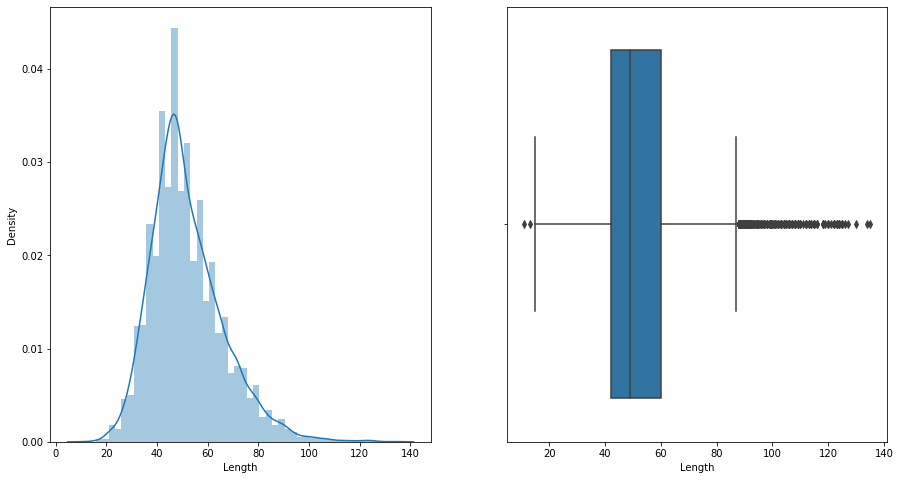

In [33]:
# Distribution of nonclickbait data lengths

print("Skewness of Non Clickbait title lengths: ", df_eda[df_eda["Target"] == "non_clickbait"]["Length"].skew())
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df_eda[df_eda["Target"] == "non_clickbait"]["Length"])

plt.subplot(1,2,2)
sns.boxplot(df_eda[df_eda["Target"] == "non_clickbait"]["Length"])

Non Clickbait titles are clearly more right skewed. There are a lot of outliers. 
Skewness is also high. 

#### This indicates that the length of the non-clickbait articles tend to be much longer. 

##### CHECKING INFLUENCE OF TITLE LENGTH ON THE TARGET
Influence of this column can be tested by doing the **One Way ANOVA test**

    H0: The mean lengths of clickbait and non-clickbait titles are the same.
        Length_clickbait = Length_nonclickbait
    H1: The mean lengths of clickbait and non-clickbait titles are not the same.
        Length_clickbait <> Length_nonclickbait
    

In [34]:
# Shapiro test on both the samples
clickbait_lengths = df_eda[df_eda["Target"] == "clickbait"]["Length"]
non_clickbait_lengths = df_eda[df_eda["Target"] == "non_clickbait"]["Length"]

print("Shapiro test for clickbait titles: ", stats.shapiro(clickbait_lengths))
print("Shapiro test for nonclickbait titles: ", stats.shapiro(non_clickbait_lengths))

Shapiro test for clickbait titles:  (0.9972671270370483, 1.7245549777939172e-16)
Shapiro test for nonclickbait titles:  (0.9572757482528687, 0.0)


Since the Shapiro test fails for both the samples, we have to opt for a non-parametric test

**KRUSKAL-WALLIS TEST**

In [35]:
stats.kruskal(clickbait_lengths, non_clickbait_lengths)

KruskalResult(statistic=809.2546870617906, pvalue=5.247348579221207e-178)

We clearly notice that the pvalue is much lesser than alpha (0.05). 
We reject the null hypothesis. 
### Length of title is a significant parameter to predict the target. 
***

### Feature Extraction: Presence of numbers in the title 

    Does occurence of some numbers show any pattern among different titles? 

In [36]:
df_eda["Has any number"] = df_eda["Text Data"].apply(lambda x : any (substr.isdigit() for substr in x))
df_eda.head()

Text Data  ... Has any number
0                                 should i get bings  ...          False
1      which tv female friend group do you belong in  ...          False
2  the new "star wars: the force awakens" trailer...  ...          False
3  this vine of new york on "celebrity big brothe...  ...          False
4  a couple did a stunning photo shoot with their...  ...          False

[5 rows x 4 columns]

In [37]:
pd.crosstab(df_eda["Has any number"], df_eda["Target"])

Target          clickbait  non_clickbait
Has any number                          
False                8942          13016
True                 7057           2985

In [38]:
# Percentage of titles with or without numbers
pd.crosstab(df_eda["Has any number"], df_eda["Target"]) / df.shape[0] *100

Target          clickbait  non_clickbait
Has any number                          
False           27.943750      40.675000
True            22.053125       9.328125

In [39]:
print("Percentage of Clickbait with No numbers: ",round(8942/(8942+7057)*100,2),"%")
print("Percentage of Clickbait with numbers: ",round(7057/(8942+7057)*100,2),"%")
print("Percentage of Non-Clickbait with No numbers: ",round(13016/(13106+2985)*100,2),"%")
print("Percentage of Non-Clickbait with numbers: ",round(2985/(13106+2985)*100,2),"%")

Percentage of Clickbait with No numbers:  55.89 %
Percentage of Clickbait with numbers:  44.11 %
Percentage of Non-Clickbait with No numbers:  80.89 %
Percentage of Non-Clickbait with numbers:  18.55 %


Consider the clickbait data first:
    
    There is almost an equal percentage of texts that have no numbers in them and those that don't. 
    This means that about half 

But, among the non-clickbait data:
    
    An overwhelming ~81% of non-clickbait titles have no numbers in them. Only 18.5% of non-clickbait titles have numbers in them. 
    This could be a valuable trend.

We can try and test if this column has any impact on the target or not by doing a chisquare test of independence

    H0: The Columns Target and Has any number are independent
    H1: The Columns Target and Has any number are dependent
    
#### Chisquare test of independence

In [40]:
chistat, pvalue, dof, expected_values = stats.chi2_contingency(pd.crosstab(df_eda["Has any number"], df_eda["Target"]))

In [41]:
chicrit = stats.chi2.isf(0.05, 1)

In [42]:
chicrit, chistat

(3.8414588206941285, 2405.875152238771)

In [43]:
pvalue

0.0

We clearly reject the null hypothesis. 

### Has any Number is a significant parameter to predict the target. 
***

### Feature Extraction - Question Words in the title

Many of the clickbait titles are of a question format. 

"?" symbol is used sometimes

But many times, though "?" is not present, question words that indicate a connotation of a query are present.

In [44]:
question_words = ["?", "what", "who", "why", "when", "how", "where", "which", "should","would", "whose"]

In [45]:
question_word_counts = []
for i in df_eda.index:
    count = 0
    for word in df_eda.iloc[i]["Text Data"].split():
        if word in question_words: 
            count = count +1
    question_word_counts.append(count)
df_eda["Number of Question words"] = question_word_counts
df_eda.head()

Text Data  ... Number of Question words
0                                 should i get bings  ...                        1
1      which tv female friend group do you belong in  ...                        1
2  the new "star wars: the force awakens" trailer...  ...                        0
3  this vine of new york on "celebrity big brothe...  ...                        0
4  a couple did a stunning photo shoot with their...  ...                        0

[5 rows x 5 columns]

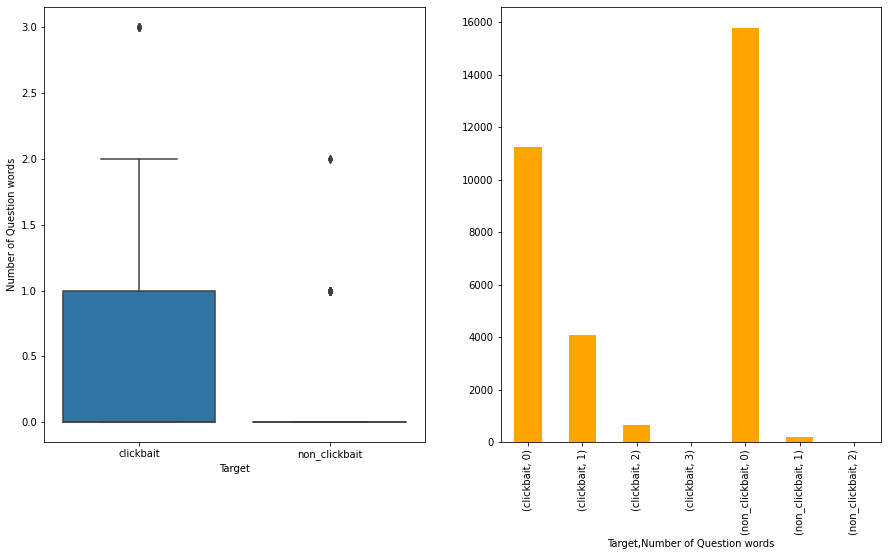

In [46]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.boxplot(y = df_eda["Number of Question words"], x = df_eda["Target"])

plt.subplot(1,2,2)
df_eda.groupby(by="Target")["Number of Question words"].value_counts().plot(kind = "bar", color = ["orange"])

We can clearly see that there a lot more clickbait titles with question words in them. 

Most of the non_clickbait titles have no question format in them. 

Many clickbait titles have 1 or 2 question words in them. 

In [47]:
pd.crosstab(df_eda["Number of Question words"], df_eda["Target"])

Target                    clickbait  non_clickbait
Number of Question words                          
0                             11261          15793
1                              4063            205
2                               663              3
3                                12              0

##### CHECKING INFLUENCE OF NUMBER OF QUESTION WORDS ON THE TARGET

We perform a **Chi-Square Test of Independence** to test this.

    H0: The Columns Target and Question Words are independent
    H1: The Columns Target and Question Words are dependent


In [48]:
# Chisquare test
stats.chi2_contingency(pd.crosstab(df_eda["Number of Question words"], df_eda["Target"]))

(4912.626297730871, 0.0, 3, array([[1.35261546e+04, 1.35278454e+04],
        [2.13386663e+03, 2.13413337e+03],
        [3.32979188e+02, 3.33020812e+02],
        [5.99962500e+00, 6.00037500e+00]]))

In [49]:
stats.chi2.isf(0.05, 3)

7.814727903251178

We reject H0 overwhelmingly. The number of question words and target are closely related in this form. 

### The target depends on the Number of Question Words

****

### Feature Engineering : Common words and stopwords

In [50]:
def countvectorizer(dataset, stopwords = None):
    vectorizer = CountVectorizer(stop_words=stopwords)
    vectorizer.fit(dataset)
    #vectorizer.vocabulary_
    vector = vectorizer.transform(dataset)
    
    words = vector.sum(axis=0)
    words_freq = [(word, words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_tf = pd.DataFrame(list(sorted(words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','Count'])
    
    return vectorizer, vector, words_tf

def plot_common_words(words_tf, n=50):
    
    plt.figure(figsize = (15,8))
    ax = sns.barplot(words_tf.head(n=n).Terms, words_tf.head(n=n).Count,palette="BuPu_r")
    ax.set_xticklabels(words_tf.head(n=n).Terms, rotation = 90)
    plt.show()
    return

    

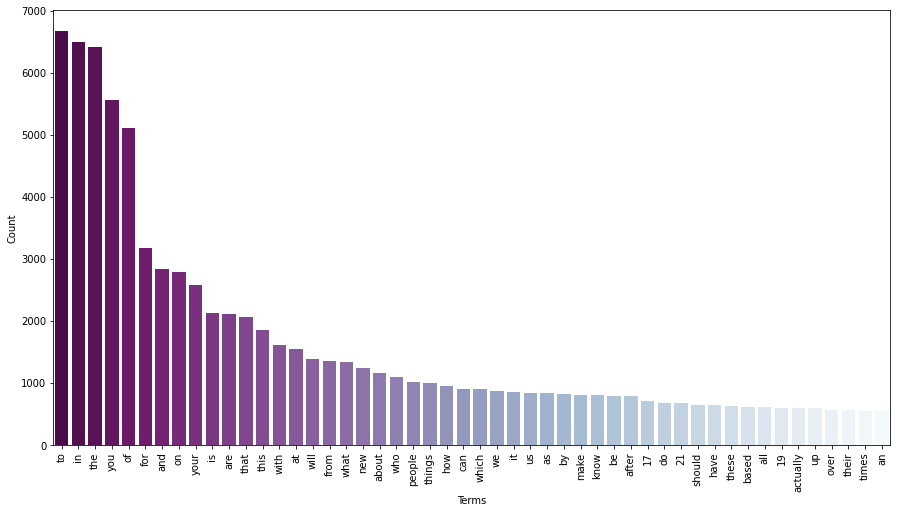

In [51]:
# Vectorizing and plotting for the enire dataset
vectorizer_full, vector_full, words_tf_full = countvectorizer(df_eda["Text Data"])
plot_common_words(words_tf_full, n=50)

In [52]:
# Number of features selected
vector_full.toarray().shape

(32000, 22840)

### We see that many of the top 50 words are Stopwords. 
### Let's visualize the common words by removing the Stopwords from the sentences. 

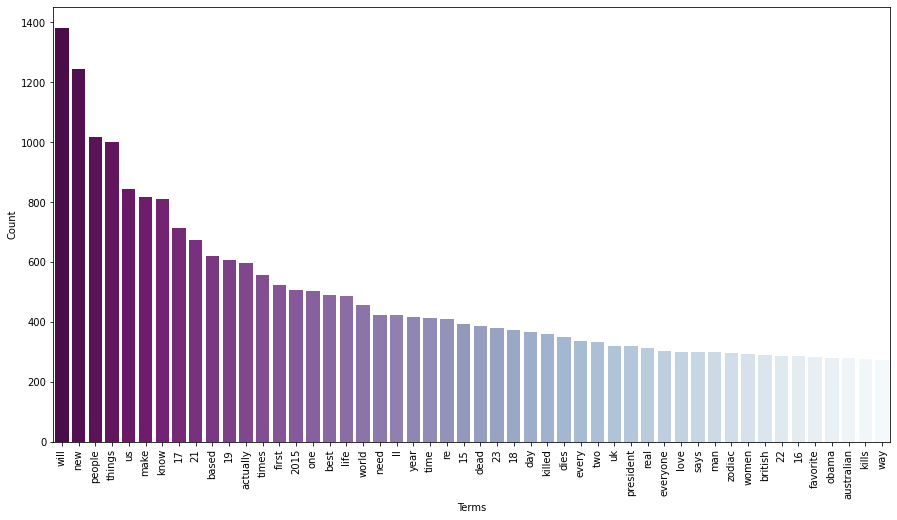

In [53]:
# Vectorizing and plotting for the dataset after stopword removal
vectorizer_sw_removed, vector_sw_removed, words_tf_sw_removed = countvectorizer(df_eda["Text Data"], stopwords=STOPWORDS)
plot_common_words(words_tf_sw_removed, n=50)

In [54]:
# Number of features selected
vector_sw_removed.toarray().shape

(32000, 22713)

We see that the important words are indeed different once the fillers are removed. 

Words like will, new, people, things, us etc appear the most in the dataset now. 

#### We can now proceed to understand the top 50 most common (stop word eliminated) words in the clickbait and nonclickbait data specifically. 

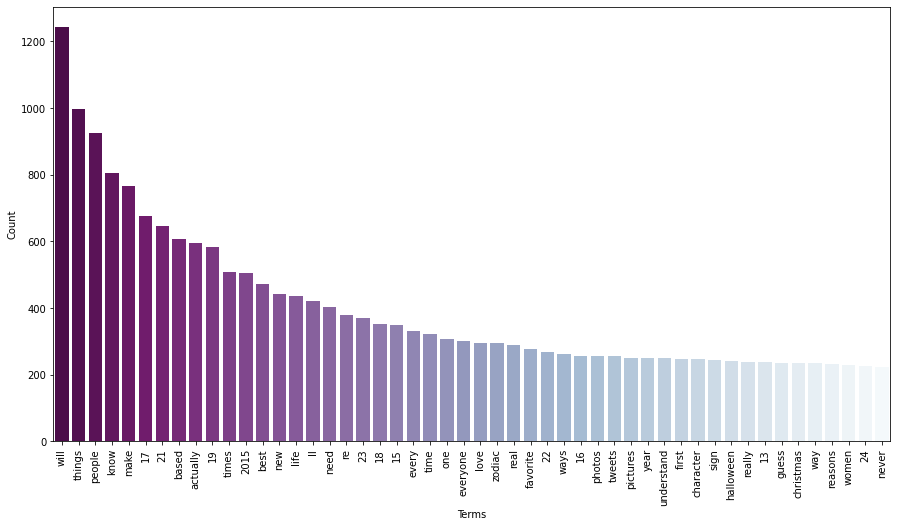

In [55]:
# Vectorizing and plotting for the clickbait dataset after stopword removal
vectorizer_cb, vector_cb, words_tf_cb = countvectorizer(df_eda[df_eda["Target"] == "clickbait"]["Text Data"], stopwords=STOPWORDS)
plot_common_words(words_tf_cb, n=50)

In [56]:
# Number of features selected
vector_cb.toarray().shape

(15999, 11435)

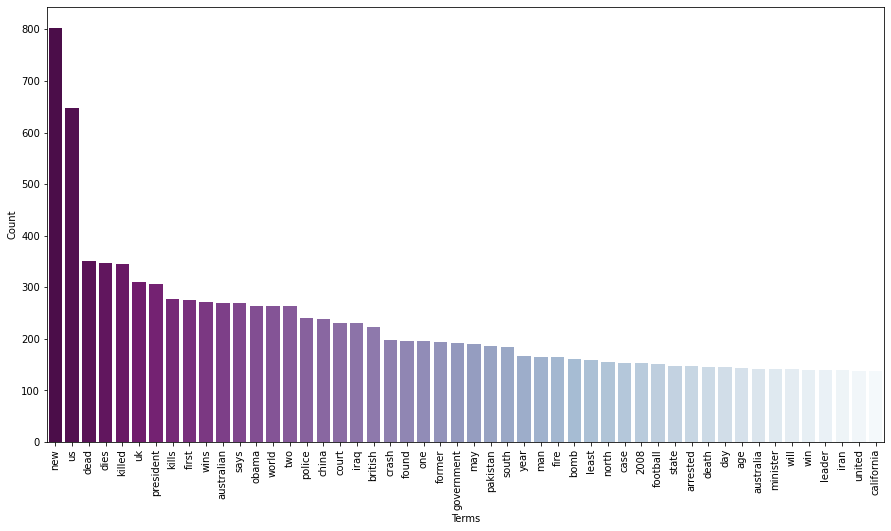

In [57]:
# Vectorizing and plotting for the nonclickbait dataset after stopword removal
vectorizer_ncb, vector_ncb, words_tf_ncb = countvectorizer(df_eda[df_eda["Target"] == "non_clickbait"]["Text Data"], stopwords=STOPWORDS)
plot_common_words(words_tf_ncb, n=50)

In [58]:
# Number of features selected
vector_ncb.toarray().shape

(16001, 16812)

### So, removal of stopwords might be quite beneficial in the creation of Bag of Words. 

# Model Building, Evaluation and Validation

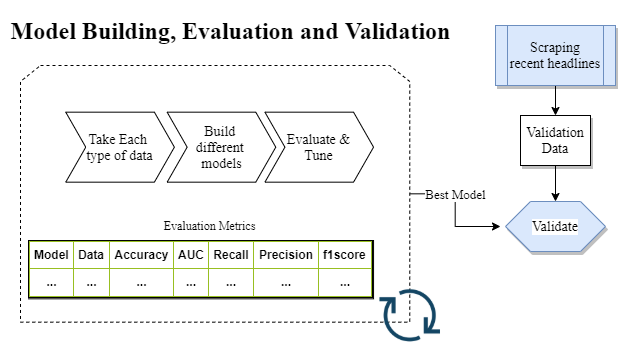

### Prepping the extracted features for modelling

In [59]:
X = df_eda[["Length","Has any number","Number of Question words"]]
X.head()

Length  Has any number  Number of Question words
0      18           False                         1
1      45           False                         1
2      73           False                         0
3      67           False                         0
4     100           False                         0

In [60]:
y = df_eda["Target"]
y.head()

0    clickbait
1    clickbait
2    clickbait
3    clickbait
4    clickbait
Name: Target, dtype: object

In [61]:
# Scaling
df_scaled = pd.DataFrame()
for col in ["Length", "Number of Question words"]:
    df_scaled[col] = (X[col] - X[col].min()) / (X[col].min() - X[col].max())
df_scaled.head()

Length  Number of Question words
0 -0.093023                 -0.333333
1 -0.302326                 -0.333333
2 -0.519380                 -0.000000
3 -0.472868                 -0.000000
4 -0.728682                 -0.000000

In [62]:
# Encoding
df_scaled["Has any number"] = [1 if X.iloc[i]["Has any number"] else 0 for i in range(X.shape[0])]
df_scaled.head()

Length  Number of Question words  Has any number
0 -0.093023                 -0.333333               0
1 -0.302326                 -0.333333               0
2 -0.519380                 -0.000000               0
3 -0.472868                 -0.000000               0
4 -0.728682                 -0.000000               0

In [63]:
# 
Y = y.replace(to_replace=["clickbait", "non_clickbait"],value = [1,0] )
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

### Train test split

In [64]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_scaled, Y, test_size=0.3, random_state=10)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((22400, 3), (9600, 3), (22400,), (9600,))

### Evaluation Metrics - Functions

In [65]:
def plot_confusion_matrix(model, X, Ytrue):
    ypred = model.predict(X)
    cm = confusion_matrix(Ytrue, ypred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0 (non_clickbait)','Predicted:1 (clickbait)'], index = ['Actual:0 (non_clickbait)','Actual:1 (clickbait)'])
    sns.heatmap(conf_matrix, annot = True,fmt = 'd', linewidths = 0.1, annot_kws = {'size':25})
    plt.show()
    
def plt_roc_curve(model,model_type, X, Ytrue):
    #y_pred_prob = model.predict_proba(X)[:,1]
    y_pred_prob = model.predict(X)
    fpr, tpr, thresholds = roc_curve(Ytrue, y_pred_prob)
    plt.plot(fpr, tpr)

    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    title = "ROC curve for "+ model_type + " Classifier"
    plt.title(title, fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(Ytrue, y_pred_prob),4)))
    plt.grid(True)

In [66]:
def get_test_report(model, X, Ytrue):
    Ytrue = Ytrue.astype(np.float)
    test_pred = model.predict(X)
    print(type(Ytrue[0]), type(test_pred[0]))
    #print(Ytrue)
    #print(test_pred)
    return(classification_report(Ytrue, test_pred, output_dict = True))

In [67]:
score_card = pd.DataFrame(columns=['Model Name','Specifications','Hyperparameter(s)', 
                                   'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'f1-score'])
def update_score_card(mname, specs,ytest, ypred,hyp ):

    global score_card

    score_card = score_card.append({'Model Name' : mname,
                                    'Specifications' : specs,
                                    'Hyperparameter(s)': hyp,
                                    'AUC Score' : roc_auc_score(ytest, ypred),
                                    'Precision Score': precision_score(ytest, ypred),
                                    'Recall Score': recall_score(ytest, ypred),
                                    'Accuracy Score': accuracy_score(ytest, ypred),
                                    'f1-score': f1_score(ytest, ypred)}, 
                                    ignore_index = True)

# Models with Extracted Features

*   Logistic Regression
*   KNN
*   Gaussian Naive Bayes
*   Decision Tree



### Model 1 - Logistic Regression with extracted features

In [68]:
Xtrain1 = sm.add_constant(Xtrain)
Xtest1 = sm.add_constant(Xtest)

m_logit = sm.Logit(Ytrain, Xtrain1).fit()
m_logit.summary()

Optimization terminated successfully.
         Current function value: 0.542517
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                22400
Model:                          Logit   Df Residuals:                    22396
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                  0.2173
Time:                        16:26:31   Log-Likelihood:                -12152.
converged:                       True   LL-Null:                       -15526.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.9120      0.056    -34.039      0.000      -2.022      -1.802
Length                      -2.9030      0.137    -21.133      0.000      -3.172      -2.634
Number of Question words   -10.7165      0.260    -41.184      0.000     -11.227     -10.207
Has any number               1.5193      0.034     45.285      0.000       1.454       1.585
============================================================================================
"""

In [69]:
m_logit.pred_table()

array([[8846., 2300.],
       [3867., 7387.]])

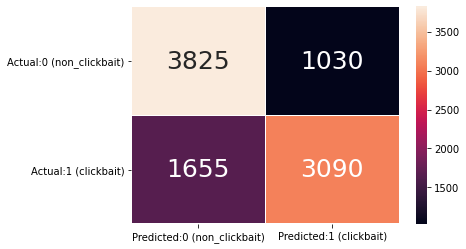

In [70]:
ypred1 = [1 if i >=0.5 else 0 for i in m_logit.predict(Xtest1)]
cm = confusion_matrix(Ytest, ypred1)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0 (non_clickbait)','Predicted:1 (clickbait)'], index = ['Actual:0 (non_clickbait)','Actual:1 (clickbait)'])
sns.heatmap(conf_matrix, annot = True,fmt = 'd', linewidths = 0.1, annot_kws = {'size':25})
plt.show()
    

In [71]:
accuracy_score(Ytest, ypred1)*100

72.03125

In [72]:
print(classification_report(Ytest, ypred1))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      4855
           1       0.75      0.65      0.70      4745

    accuracy                           0.72      9600
   macro avg       0.72      0.72      0.72      9600
weighted avg       0.72      0.72      0.72      9600



In [73]:
update_score_card("Logistic Regression Model",
                 "Extracted Features",
                  Ytest, ypred1, "Probability Cutoff: 0.5"
                 )
score_card

Model Name      Specifications  ... Accuracy Score  f1-score
0  Logistic Regression Model  Extracted Features  ...       0.720313  0.697124

[1 rows x 8 columns]

### Model 2 - KNN with Extracted features

In [74]:
knn = KNeighborsClassifier(n_neighbors = 11)
m_knn = knn.fit(Xtrain1, Ytrain)

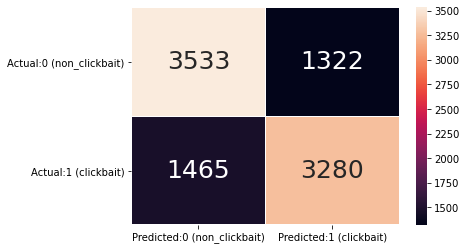

In [75]:
plot_confusion_matrix(m_knn,Xtest1, Ytest)

In [76]:
print(classification_report(Ytest, m_knn.predict(Xtest1)))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      4855
           1       0.71      0.69      0.70      4745

    accuracy                           0.71      9600
   macro avg       0.71      0.71      0.71      9600
weighted avg       0.71      0.71      0.71      9600



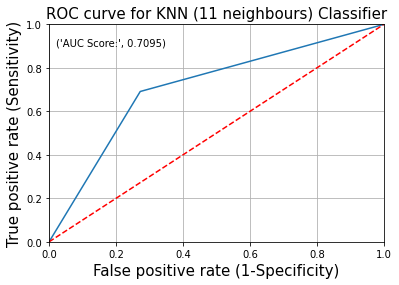

In [77]:
plt_roc_curve(m_knn, "KNN (11 neighbours)",Xtest1, Ytest )

In [78]:
update_score_card("KNN",
                 "Extracted Features",
                  Ytest, m_knn.predict(Xtest1), "Num of Neighbours: 11")
score_card

Model Name      Specifications  ... Accuracy Score  f1-score
0  Logistic Regression Model  Extracted Features  ...       0.720313  0.697124
1                        KNN  Extracted Features  ...       0.709688  0.701829

[2 rows x 8 columns]

### Model 3 - Naive Bayes with Extracted features

In [79]:
nb = GaussianNB()
m_gnb = nb.fit(Xtrain1, Ytrain)

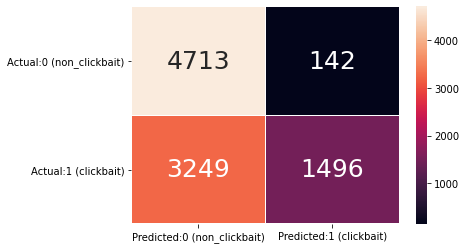

In [80]:
plot_confusion_matrix(m_gnb,Xtest1, Ytest)

In [81]:
print(classification_report(Ytest, m_gnb.predict(Xtest1)))

              precision    recall  f1-score   support

           0       0.59      0.97      0.74      4855
           1       0.91      0.32      0.47      4745

    accuracy                           0.65      9600
   macro avg       0.75      0.64      0.60      9600
weighted avg       0.75      0.65      0.60      9600



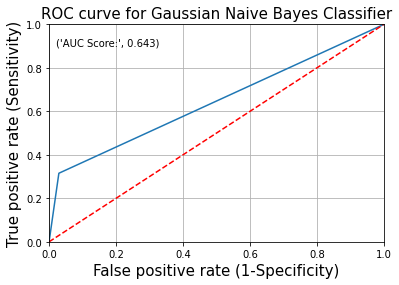

In [82]:
plt_roc_curve(m_gnb, "Gaussian Naive Bayes",Xtest1, Ytest )

In [83]:
update_score_card("Gaussian Naive Bayes",
                 "Extracted Features",
                  Ytest, m_gnb.predict(Xtest1),"-")
score_card

Model Name      Specifications  ... Accuracy Score  f1-score
0  Logistic Regression Model  Extracted Features  ...       0.720313  0.697124
1                        KNN  Extracted Features  ...       0.709688  0.701829
2       Gaussian Naive Bayes  Extracted Features  ...       0.646771  0.468745

[3 rows x 8 columns]

### Model 4 - Decision Tree with extracted features

In [84]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
m_tree = decision_tree.fit(Xtrain1, Ytrain)

In [85]:
labels = Xtrain1.columns
dot_data = tree.export_graphviz(m_tree, feature_names = labels, class_names = ["0","1"])  
tree_graph = pydotplus.graph_from_dot_data(dot_data)  
Image(tree_graph.create_png())

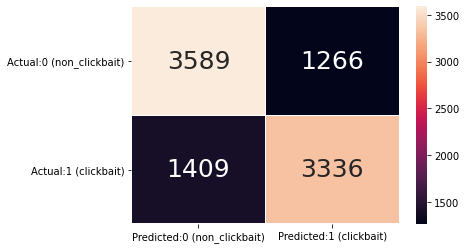

In [86]:
plot_confusion_matrix(m_tree,Xtest1, Ytest)

In [87]:
print(classification_report(Ytest, m_tree.predict(Xtest1)))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      4855
           1       0.72      0.70      0.71      4745

    accuracy                           0.72      9600
   macro avg       0.72      0.72      0.72      9600
weighted avg       0.72      0.72      0.72      9600



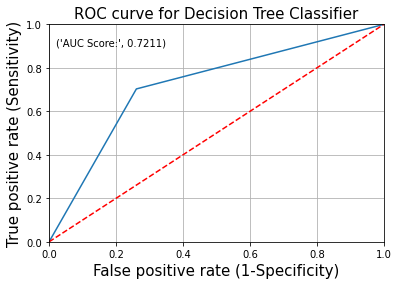

In [88]:
plt_roc_curve(m_tree, "Decision Tree",Xtest1, Ytest )

# Current Score Card

In [89]:
update_score_card("Decision Tree",
                 "Extracted Features",
                  Ytest, m_tree.predict(Xtest1), "Criterion: entropy")
score_card

Model Name      Specifications  ... Accuracy Score  f1-score
0  Logistic Regression Model  Extracted Features  ...       0.720313  0.697124
1                        KNN  Extracted Features  ...       0.709688  0.701829
2       Gaussian Naive Bayes  Extracted Features  ...       0.646771  0.468745
3              Decision Tree  Extracted Features  ...       0.721354  0.713812

[4 rows x 8 columns]

# Models with Bag of Words Dataset - Count Vectorizer

#### We first perform the train test split and then vectorize the data
For this, we use the lower case transformed data. 

In [90]:
Xtrain2, Xtest2, Ytrain2, Ytest2 = train_test_split(df_eda["Text Data"], Y, test_size=0.3, random_state=10)
Xtrain2.shape, Xtest2.shape, Ytrain2.shape, Ytest2.shape

((22400,), (9600,), (22400,), (9600,))

In [91]:
vect = CountVectorizer(stop_words=STOPWORDS)
Xtrain_transform = vect.fit_transform(Xtrain2)

In [92]:
Xtrain_transform

<22400x19353 sparse matrix of type '<class 'numpy.int64'>'
	with 140092 stored elements in Compressed Sparse Row format>

In [93]:
Xtest_transform = vect.transform(Xtest2)
Xtest_transform

<9600x19353 sparse matrix of type '<class 'numpy.int64'>'
	with 56213 stored elements in Compressed Sparse Row format>

### Model 5 - Multinomial Naive Bayes Model

In [94]:
nb = MultinomialNB()
m_cv_mnb = nb.fit(Xtrain_transform, Ytrain2)

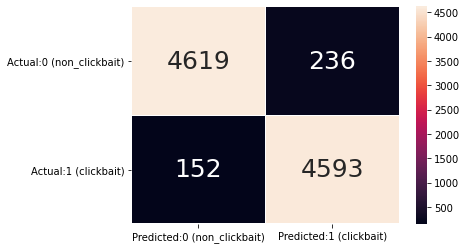

In [95]:
plot_confusion_matrix(m_cv_mnb,Xtest_transform, Ytest2)

In [96]:
print(classification_report(Ytest2, m_cv_mnb.predict(Xtest_transform)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4855
           1       0.95      0.97      0.96      4745

    accuracy                           0.96      9600
   macro avg       0.96      0.96      0.96      9600
weighted avg       0.96      0.96      0.96      9600



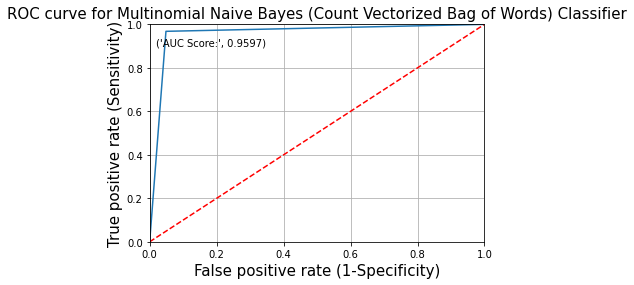

In [97]:
plt_roc_curve(m_cv_mnb, "Multinomial Naive Bayes (Count Vectorized Bag of Words)",Xtest_transform, Ytest2 )

In [98]:
update_score_card("Multinomial Naive Bayes",
                 "Count Vectorized Bag of Words. Stopwords Removed",
                  Ytest2, m_cv_mnb.predict(Xtest_transform), "-")
score_card

Model Name  ...  f1-score
0  Logistic Regression Model  ...  0.697124
1                        KNN  ...  0.701829
2       Gaussian Naive Bayes  ...  0.468745
3              Decision Tree  ...  0.713812
4    Multinomial Naive Bayes  ...  0.959474

[5 rows x 8 columns]

### Finding likelihoods for Multinomial Naive Bayes Classifer

In [99]:
non_clickbait_token_count = m_cv_mnb.feature_count_[0, :]
non_clickbait_token_count

array([ 0., 76.,  1., ...,  2.,  1.,  2.])

In [100]:
clickbait_token_count = m_cv_mnb.feature_count_[1, :]
clickbait_token_count

array([2., 8., 0., ..., 0., 0., 0.])

In [101]:
Xtrain_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':Xtrain_tokens, 'non_clickbait':non_clickbait_token_count, 'clickbait':clickbait_token_count}).set_index('token')

In [102]:
tokens.sample(5, random_state=15)

non_clickbait  clickbait
token                                 
lawrence                1.0       24.0
personalized            0.0        1.0
19                     15.0      418.0
related                 7.0        2.0
payne                   0.0        3.0

##### Laplace Smoothing

In [103]:
# add 1 to both column counts to avoid dividing by 0
tokens['non_clickbait'] = tokens.non_clickbait + 1
tokens['clickbait'] = tokens.clickbait + 1
tokens.sample(5, random_state=15)

non_clickbait  clickbait
token                                 
lawrence                2.0       25.0
personalized            1.0        2.0
19                     16.0      419.0
related                 8.0        3.0
payne                   1.0        4.0

In [104]:
tokens['non_clickbait'] = tokens.non_clickbait / m_cv_mnb.class_count_[0]
tokens['clickbait'] = tokens.clickbait / m_cv_mnb.class_count_[1]
tokens.sample(5, random_state=15)

non_clickbait  clickbait
token                                 
lawrence           0.000179   0.002221
personalized       0.000090   0.000178
19                 0.001435   0.037231
related            0.000718   0.000267
payne              0.000090   0.000355

In [105]:
# calculate the ratio of clickbait-to-non_clickbait for each token
tokens['clickbait_ratio'] = tokens.clickbait / tokens.non_clickbait
tokens.sample(5, random_state=15)

non_clickbait  clickbait  clickbait_ratio
token                                                  
lawrence           0.000179   0.002221        12.380043
personalized       0.000090   0.000178         1.980807
19                 0.001435   0.037231        25.936189
related            0.000718   0.000267         0.371401
payne              0.000090   0.000355         3.961614

In [106]:
tokens.sort_values('clickbait_ratio', ascending=False)

non_clickbait  clickbait  clickbait_ratio
token                                               
2015            0.000090   0.032255       359.516439
things          0.000269   0.061578       228.783188
tweets          0.000090   0.016439       183.224631
guess           0.000090   0.015283       170.349387
hilarious       0.000090   0.012529       139.646881
...                  ...        ...              ...
iran            0.008254   0.000089         0.010765
minister        0.009420   0.000089         0.009432
crash           0.012561   0.000089         0.007074
kills           0.016598   0.000089         0.005354
wins            0.016957   0.000089         0.005240

[19353 rows x 3 columns]

In [107]:
tokens.loc['love', 'clickbait_ratio']

67.3474320241692

In [108]:
tokens.loc['government', 'clickbait_ratio']

0.02934528628504104

### Model 6 - Logistic Regression with Count Vectorized Bag of Words

In [109]:
logreg = LogisticRegression()
m_cv_logit =logreg.fit(Xtrain_transform, Ytrain2)

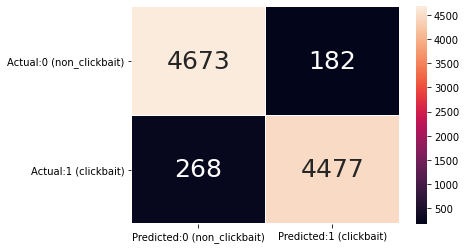

In [110]:
plot_confusion_matrix(m_cv_logit,Xtest_transform, Ytest2)

In [111]:
print(classification_report(Ytest2, m_cv_logit.predict(Xtest_transform)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4855
           1       0.96      0.94      0.95      4745

    accuracy                           0.95      9600
   macro avg       0.95      0.95      0.95      9600
weighted avg       0.95      0.95      0.95      9600



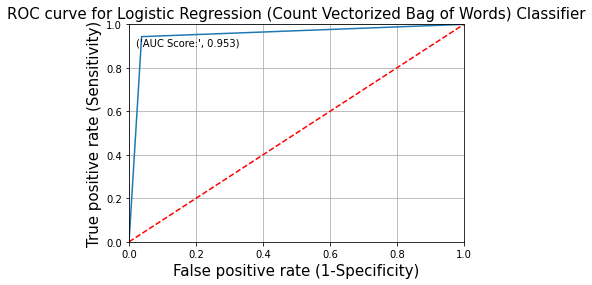

In [112]:
plt_roc_curve(m_cv_logit, "Logistic Regression (Count Vectorized Bag of Words)",Xtest_transform, Ytest2 )

In [113]:
update_score_card("Logistic Regression",
                 "Count Vectorized Bag of Words. Stopwords Removed",
                  Ytest2, m_cv_logit.predict(Xtest_transform), "-")
score_card

Model Name  ...  f1-score
0  Logistic Regression Model  ...  0.697124
1                        KNN  ...  0.701829
2       Gaussian Naive Bayes  ...  0.468745
3              Decision Tree  ...  0.713812
4    Multinomial Naive Bayes  ...  0.959474
5        Logistic Regression  ...  0.952148

[6 rows x 8 columns]

### Model 7 - Decision Trees with Count Vectorized Bag of Words

In [114]:
Xtrain_transform

<22400x19353 sparse matrix of type '<class 'numpy.int64'>'
	with 140092 stored elements in Compressed Sparse Row format>

In [115]:
len(vect.get_feature_names())

19353

In [116]:
decision_tree = DecisionTreeClassifier(max_depth=10,
                                        min_samples_split=5,
                                        min_samples_leaf=5)
m_cv_tree =decision_tree.fit(Xtrain_transform, Ytrain2)

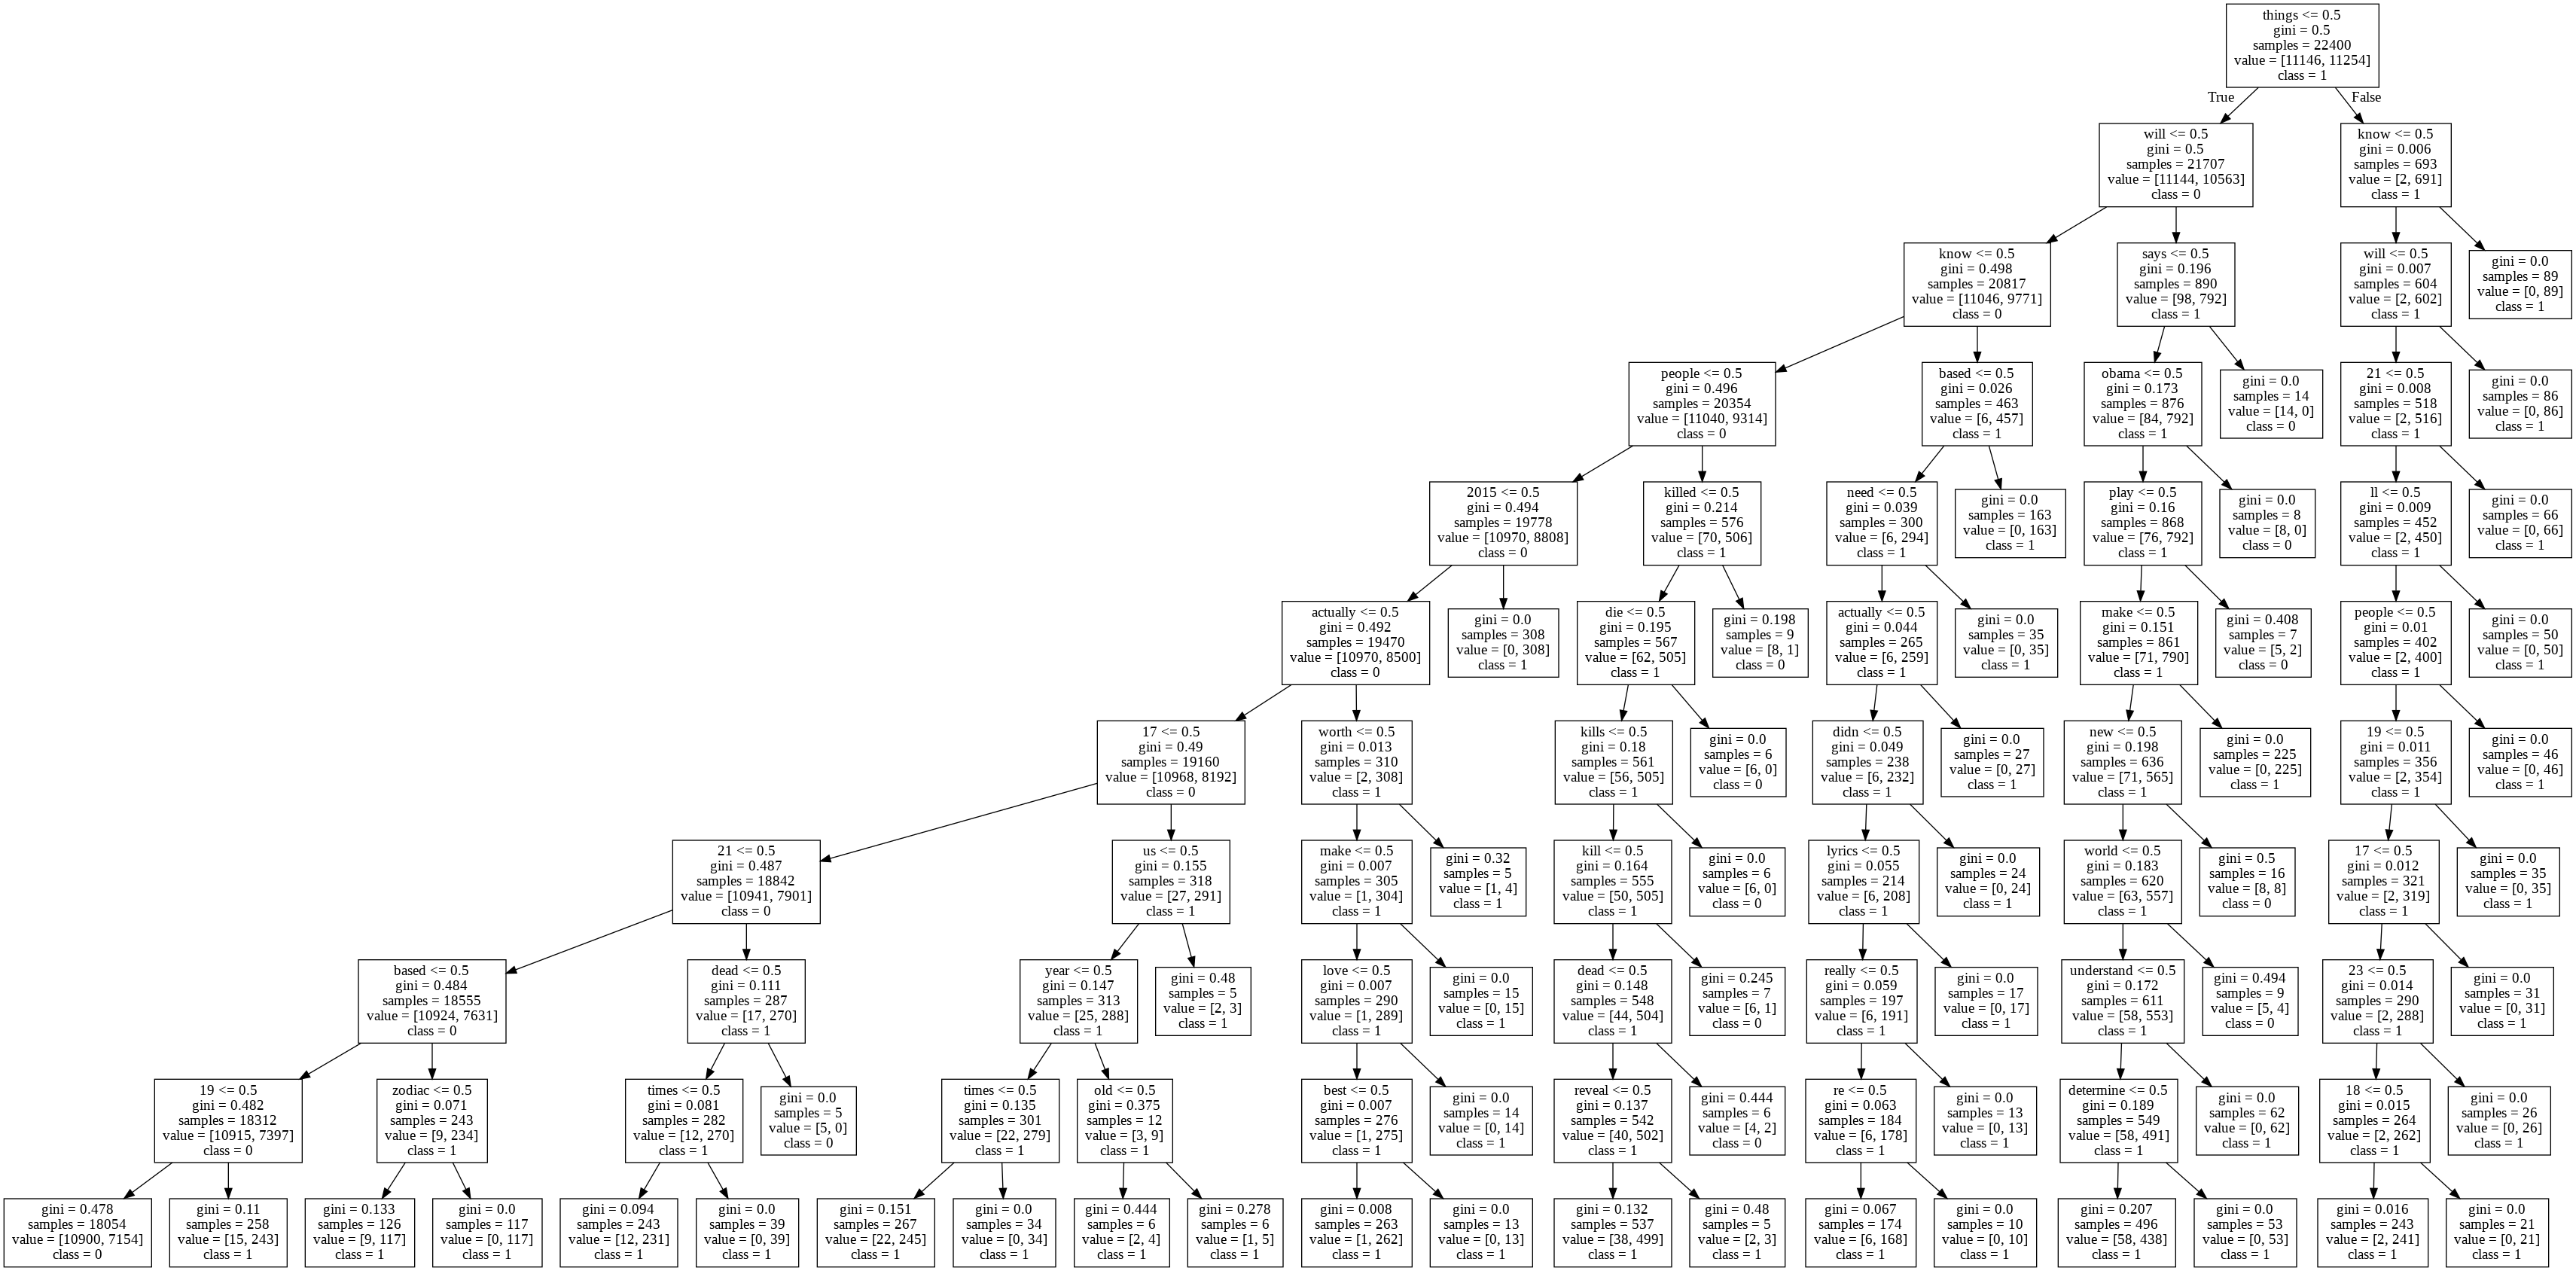

In [117]:
labels = vect.get_feature_names()
dot_data = tree.export_graphviz(m_cv_tree, feature_names = labels, class_names = ["0","1"])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

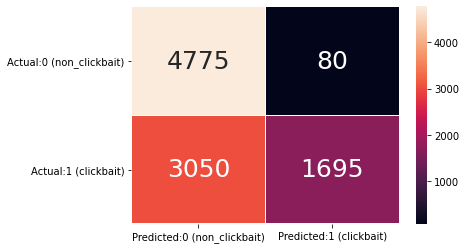

In [118]:
plot_confusion_matrix(m_cv_tree,Xtest_transform, Ytest2)

In [119]:
print(classification_report(Ytest2, m_cv_tree.predict(Xtest_transform)))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75      4855
           1       0.95      0.36      0.52      4745

    accuracy                           0.67      9600
   macro avg       0.78      0.67      0.64      9600
weighted avg       0.78      0.67      0.64      9600



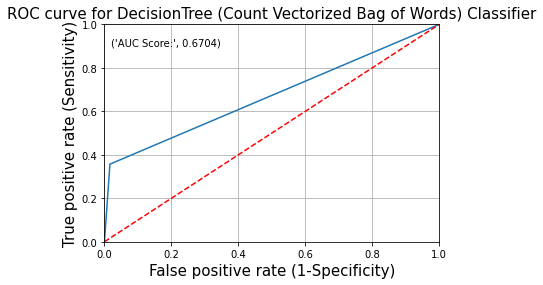

In [120]:
plt_roc_curve(m_cv_tree, "DecisionTree (Count Vectorized Bag of Words)",Xtest_transform, Ytest2 )

# Current Score Card

In [121]:
update_score_card("Decision Tree",
                 "Count Vectorized Bag of Words. Stopwords Removed",
                  Ytest2, m_cv_tree.predict(Xtest_transform), "Criterion: Gini, Max Depth 10, Leaf and Split Sample sizes 5")
score_card

Model Name  ...  f1-score
0  Logistic Regression Model  ...  0.697124
1                        KNN  ...  0.701829
2       Gaussian Naive Bayes  ...  0.468745
3              Decision Tree  ...  0.713812
4    Multinomial Naive Bayes  ...  0.959474
5        Logistic Regression  ...  0.952148
6              Decision Tree  ...  0.519939

[7 rows x 8 columns]

# Models with TF-IDF Vectorizer


*   Logistic Regression

*   Multinomial Naive Bayes
*   Random Forest
*   Adaboost
*   Gradient Boosting
*   Gradient Boosting with Grid Search
*   Support Vector Machine






In [122]:
Xtrain3, Xtest3, Ytrain3, Ytest3 = train_test_split(df_eda["Text Data"], Y, test_size=0.3, random_state=10)
Xtrain3.shape, Xtest3.shape, Ytrain3.shape, Ytest3.shape

((22400,), (9600,), (22400,), (9600,))

### Logistic Regression with TF-IDF Vectorizer

In [123]:
Logistic = make_pipeline(TfidfVectorizer(),LogisticRegression())

In [124]:
Logistic.fit(Xtrain3, Ytrain3)
labels1 = Logistic.predict(Xtest3)

Text(90.77375, 0.5, 'predicted label')

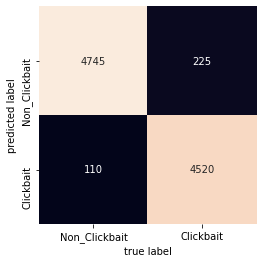

In [125]:
mat = confusion_matrix(Ytest3, labels1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Non_Clickbait", "Clickbait"], yticklabels=["Non_Clickbait", "Clickbait"])
plt.xlabel('true label')
plt.ylabel('predicted label')

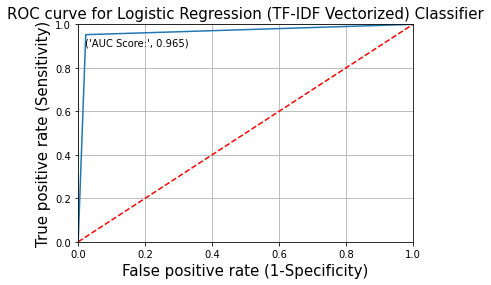

In [126]:
plt_roc_curve(Logistic, "Logistic Regression (TF-IDF Vectorized)",Xtest3, Ytest3 )

In [127]:
update_score_card("Logistic Regression",
                 "TF-IDF Vectorized",
                  Ytest3, Logistic.predict(Xtest3),"-")
score_card

Model Name  ...  f1-score
0  Logistic Regression Model  ...  0.697124
1                        KNN  ...  0.701829
2       Gaussian Naive Bayes  ...  0.468745
3              Decision Tree  ...  0.713812
4    Multinomial Naive Bayes  ...  0.959474
5        Logistic Regression  ...  0.952148
6              Decision Tree  ...  0.519939
7        Logistic Regression  ...  0.964267

[8 rows x 8 columns]

### Multinominal Naive Bayes with TF-IDF Vectorizer

In [128]:
naive = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [129]:
naive.fit(Xtrain3, Ytrain3)
labels2 = naive.predict(Xtest3)

Text(90.77375, 0.5, 'predicted label')

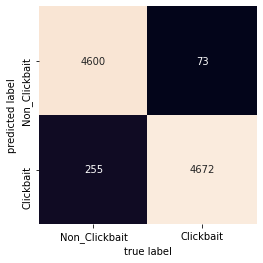

In [130]:
mat = confusion_matrix(Ytest3, labels2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Non_Clickbait", "Clickbait"], yticklabels=["Non_Clickbait", "Clickbait"])
plt.xlabel('true label')
plt.ylabel('predicted label')

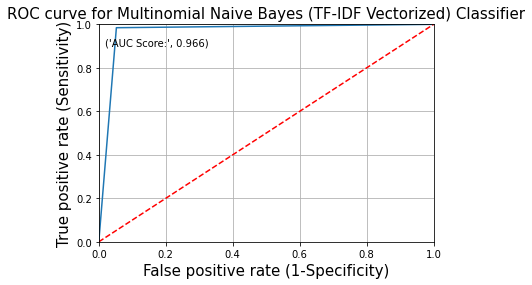

In [131]:
plt_roc_curve(naive, "Multinomial Naive Bayes (TF-IDF Vectorized)",Xtest3, Ytest3 )

In [132]:
update_score_card("Multinominal Naive Bayes",
                 "TF-IDF Vectorized",
                  Ytest3, naive.predict(Xtest3),"-")
score_card

Model Name  ...  f1-score
0  Logistic Regression Model  ...  0.697124
1                        KNN  ...  0.701829
2       Gaussian Naive Bayes  ...  0.468745
3              Decision Tree  ...  0.713812
4    Multinomial Naive Bayes  ...  0.959474
5        Logistic Regression  ...  0.952148
6              Decision Tree  ...  0.519939
7        Logistic Regression  ...  0.964267
8   Multinominal Naive Bayes  ...  0.966088

[9 rows x 8 columns]

### RandomForest with TF-IDF vectorizer

In [133]:
random = make_pipeline(TfidfVectorizer(),RandomForestClassifier())

In [134]:
random_ft=random.fit(Xtrain3, Ytrain3)


In [135]:
labels4 = random.predict(Xtest3)

Text(90.77375, 0.5, 'predicted label')

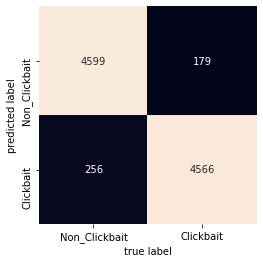

In [136]:
mat = confusion_matrix(Ytest, labels4)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Non_Clickbait", "Clickbait"], yticklabels=["Non_Clickbait", "Clickbait"])
plt.xlabel('true label')
plt.ylabel('predicted label')

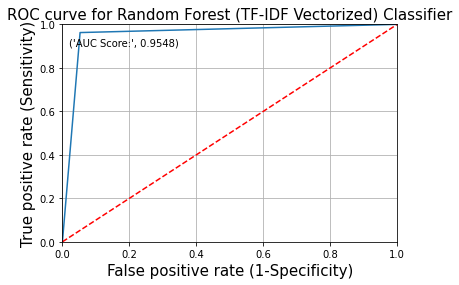

In [137]:
plt_roc_curve(random_ft, "Random Forest (TF-IDF Vectorized)",Xtest3, Ytest3 )

In [138]:
update_score_card("Random Forest",
                 "TF-IDF Vectorized",
                  Ytest3, random_ft.predict(Xtest3),"Estimators: 100")
score_card

Model Name  ...  f1-score
0  Logistic Regression Model  ...  0.697124
1                        KNN  ...  0.701829
2       Gaussian Naive Bayes  ...  0.468745
3              Decision Tree  ...  0.713812
4    Multinomial Naive Bayes  ...  0.959474
5        Logistic Regression  ...  0.952148
6              Decision Tree  ...  0.519939
7        Logistic Regression  ...  0.964267
8   Multinominal Naive Bayes  ...  0.966088
9              Random Forest  ...  0.954531

[10 rows x 8 columns]

### Adaboost with TF-IDF vectorizer

In [139]:
adaboost = make_pipeline(TfidfVectorizer(),AdaBoostClassifier(n_estimators=100))

In [140]:
adaboost.fit(Xtrain3, Ytrain3)
labels5 = adaboost.predict(Xtest3)

Text(90.77375, 0.5, 'predicted label')

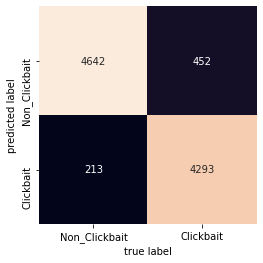

In [141]:
mat = confusion_matrix(Ytest, labels5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Non_Clickbait", "Clickbait"], yticklabels=["Non_Clickbait", "Clickbait"])
plt.xlabel('true label')
plt.ylabel('predicted label')

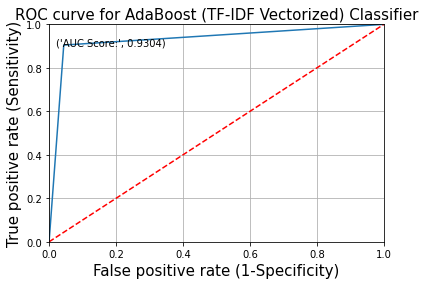

In [142]:
plt_roc_curve(adaboost, "AdaBoost (TF-IDF Vectorized)",Xtest3, Ytest3 )

In [143]:
update_score_card("AdaBoost",
                 "TF-IDF Vectorized",
                  Ytest3, adaboost.predict(Xtest3),"Estimators: 100")
score_card

Model Name  ...  f1-score
0   Logistic Regression Model  ...  0.697124
1                         KNN  ...  0.701829
2        Gaussian Naive Bayes  ...  0.468745
3               Decision Tree  ...  0.713812
4     Multinomial Naive Bayes  ...  0.959474
5         Logistic Regression  ...  0.952148
6               Decision Tree  ...  0.519939
7         Logistic Regression  ...  0.964267
8    Multinominal Naive Bayes  ...  0.966088
9               Random Forest  ...  0.954531
10                   AdaBoost  ...  0.928116

[11 rows x 8 columns]

### Gradient boost with TF-IDF vectorizer

In [144]:
gradientboost = make_pipeline(TfidfVectorizer(),GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10,learning_rate=0.01))

In [145]:
gradientboost.fit(Xtrain3, Ytrain3)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                                            learning_rate=0.01, loss='deviance',
                                            max_depth=10, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
        

In [146]:
labels6 = gradientboost.predict(Xtest3)
labels6

array([0, 0, 1, ..., 0, 0, 1])

Text(90.77375, 0.5, 'predicted label')

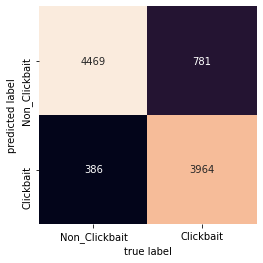

In [147]:
mat = confusion_matrix(Ytest3, labels6)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Non_Clickbait", "Clickbait"], yticklabels=["Non_Clickbait", "Clickbait"])
plt.xlabel('true label')
plt.ylabel('predicted label')

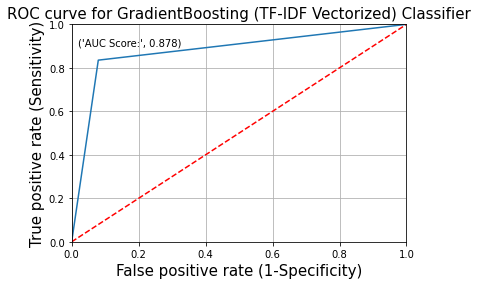

In [148]:
plt_roc_curve(gradientboost, "GradientBoosting (TF-IDF Vectorized)",Xtest3, Ytest3 )

In [149]:
update_score_card("Gradient Boosting",
                 "tf-idf Vectorized",
                  Ytest3, gradientboost.predict(Xtest3),"Estimators:150, MaxDepth:10, LearningRate:0.01")
score_card

Model Name  ...  f1-score
0   Logistic Regression Model  ...  0.697124
1                         KNN  ...  0.701829
2        Gaussian Naive Bayes  ...  0.468745
3               Decision Tree  ...  0.713812
4     Multinomial Naive Bayes  ...  0.959474
5         Logistic Regression  ...  0.952148
6               Decision Tree  ...  0.519939
7         Logistic Regression  ...  0.964267
8    Multinominal Naive Bayes  ...  0.966088
9               Random Forest  ...  0.954531
10                   AdaBoost  ...  0.928116
11          Gradient Boosting  ...  0.871688

[12 rows x 8 columns]

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
 from sklearn.pipeline import Pipeline

### Tuning hyperparameters with gridsearch

In [152]:
params={'model__learning_rate':[0.1,0.2,0.3]}
           #'model__max_depth':[3,4,5]}
pipeline = Pipeline([
   
    ('tfidf', TfidfVectorizer()),
    ('model',GradientBoostingClassifier())])
grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=params ,scoring='roc_auc')

In [153]:
grid.fit(Xtrain3,Ytrain3)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [154]:
print('Best parameters for gradientboost: ', grid.best_params_, '\n')

Best parameters for gradientboost:  {'model__learning_rate': 0.3} 



### Gradient boosting with tuned hyperparameter

In [155]:
gradientboost1 = make_pipeline(TfidfVectorizer(),GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10,learning_rate=0.3))

In [156]:
gradientboost1.fit(Xtrain3, Ytrain3)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                                            learning_rate=0.3, loss='deviance',
                                            max_depth=10, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
         

In [157]:
labels7 = gradientboost1.predict(Xtest3)
labels7

array([0, 1, 1, ..., 0, 0, 1])

Text(90.77375, 0.5, 'predicted label')

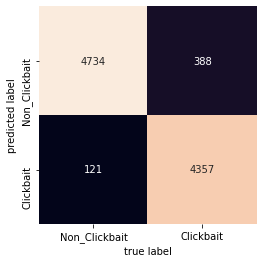

In [158]:
mat = confusion_matrix(Ytest3, labels7)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Non_Clickbait", "Clickbait"], yticklabels=["Non_Clickbait", "Clickbait"])
plt.xlabel('true label')
plt.ylabel('predicted label')

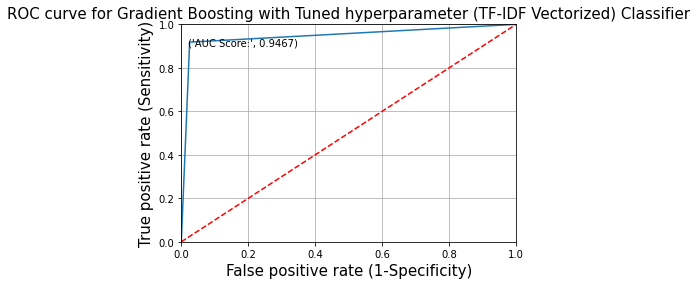

In [159]:
plt_roc_curve(gradientboost1, "Gradient Boosting with Tuned hyperparameter (TF-IDF Vectorized)",Xtest3, Ytest3 )

In [160]:
update_score_card("Gradient Boosting with tuned parameter",
                 "TF-IDF Vectorized",
                  Ytest3, gradientboost1.predict(Xtest3),"Estimators:150, MaxDepth:10, LearningRate:0.3")
score_card

Model Name  ...  f1-score
0                Logistic Regression Model  ...  0.697124
1                                      KNN  ...  0.701829
2                     Gaussian Naive Bayes  ...  0.468745
3                            Decision Tree  ...  0.713812
4                  Multinomial Naive Bayes  ...  0.959474
5                      Logistic Regression  ...  0.952148
6                            Decision Tree  ...  0.519939
7                      Logistic Regression  ...  0.964267
8                 Multinominal Naive Bayes  ...  0.966088
9                            Random Forest  ...  0.954531
10                                AdaBoost  ...  0.928116
11                       Gradient Boosting  ...  0.871688
12  Gradient Boosting with tuned parameter  ...  0.944812

[13 rows x 8 columns]

### Support Vector Machine with TF-IDF vectorizer 

In [161]:
svm = make_pipeline(TfidfVectorizer(),SVC())

In [162]:
svm.fit(Xtrain3, Ytrain3)
labels3 = svm.predict(Xtest3)

Text(90.77375, 0.5, 'predicted label')

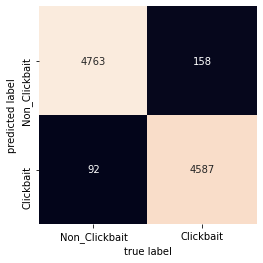

In [163]:
mat = confusion_matrix(Ytest3, labels3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Non_Clickbait", "Clickbait"], yticklabels=["Non_Clickbait", "Clickbait"])
plt.xlabel('true label')
plt.ylabel('predicted label')

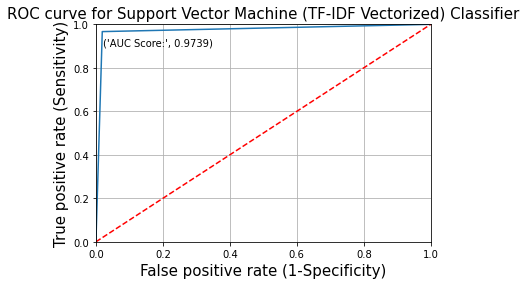

In [164]:
plt_roc_curve(svm, "Support Vector Machine (TF-IDF Vectorized)",Xtest3, Ytest3 )

In [165]:
update_score_card("Support Vector Machine",
                 "TF-IDF Vectorized",
                  Ytest3, svm.predict(Xtest3),"-")
score_card

Model Name  ...  f1-score
0                Logistic Regression Model  ...  0.697124
1                                      KNN  ...  0.701829
2                     Gaussian Naive Bayes  ...  0.468745
3                            Decision Tree  ...  0.713812
4                  Multinomial Naive Bayes  ...  0.959474
5                      Logistic Regression  ...  0.952148
6                            Decision Tree  ...  0.519939
7                      Logistic Regression  ...  0.964267
8                 Multinominal Naive Bayes  ...  0.966088
9                            Random Forest  ...  0.954531
10                                AdaBoost  ...  0.928116
11                       Gradient Boosting  ...  0.871688
12  Gradient Boosting with tuned parameter  ...  0.944812
13                  Support Vector Machine  ...  0.973472

[14 rows x 8 columns]

# Selection of best model

In [166]:
score_card

Model Name  ...  f1-score
0                Logistic Regression Model  ...  0.697124
1                                      KNN  ...  0.701829
2                     Gaussian Naive Bayes  ...  0.468745
3                            Decision Tree  ...  0.713812
4                  Multinomial Naive Bayes  ...  0.959474
5                      Logistic Regression  ...  0.952148
6                            Decision Tree  ...  0.519939
7                      Logistic Regression  ...  0.964267
8                 Multinominal Naive Bayes  ...  0.966088
9                            Random Forest  ...  0.954531
10                                AdaBoost  ...  0.928116
11                       Gradient Boosting  ...  0.871688
12  Gradient Boosting with tuned parameter  ...  0.944812
13                  Support Vector Machine  ...  0.973472

[14 rows x 8 columns]

In [167]:
score_card.to_excel('Final Score Card.xlsx')

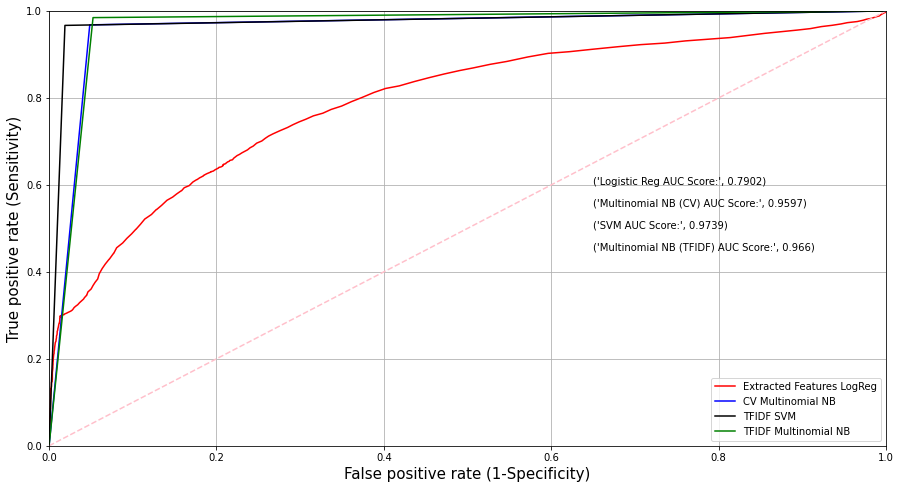

In [168]:
# ROC Curves
# We plot ROC curves for the best models of each dataset
plt.figure(figsize=(15,8))

# Extracted Features - Decision tree : Accuracy 0.721354
y_pred_prob = m_logit.predict(Xtest1)
fpr, tpr, thresholds = roc_curve(Ytest, y_pred_prob)
plt.plot(fpr, tpr, color="red")

plt.text(x = 0.65, y = 0.6, s = ('Logistic Reg AUC Score:',round(roc_auc_score(Ytest, y_pred_prob),4)))


# Count Vectorized - Multinomial Naive Bayes : Accuracy 0.959583
y_pred_prob = m_cv_mnb.predict(Xtest_transform)
fpr, tpr, thresholds = roc_curve(Ytest2, y_pred_prob)
plt.plot(fpr, tpr, color="blue")
plt.text(x = 0.65, y = 0.55, s = ('Multinomial NB (CV) AUC Score:',round(roc_auc_score(Ytest2, y_pred_prob),4)))


# TF-IDF Vectorized - SVM: Accuracy 0.973958
y_pred_prob = svm.predict(Xtest3)
fpr, tpr, thresholds = roc_curve(Ytest3, y_pred_prob)
plt.plot(fpr, tpr, color="black")
plt.text(x = 0.65, y = 0.5, s = ('SVM AUC Score:',round(roc_auc_score(Ytest3, y_pred_prob),4)))

# TF-IDF Vectorized - Multinomial Naive Bayes: Accuracy 0.965833
y_pred_prob = naive.predict(Xtest3)
fpr, tpr, thresholds = roc_curve(Ytest3, y_pred_prob)
plt.plot(fpr, tpr, color ="green")
plt.text(x = 0.65, y = 0.45, s = ('Multinomial NB (TFIDF) AUC Score:',round(roc_auc_score(Ytest3, y_pred_prob),4)))


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'--', color = "pink")

plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.legend(["Extracted Features LogReg", "CV Multinomial NB", "TFIDF SVM", "TFIDF Multinomial NB"])
plt.grid(True)

In [169]:
# Training Accuracy
accuracy_score(Ytrain3, svm.predict(Xtrain3))

0.99875

Text(90.77375, 0.5, 'predicted label')

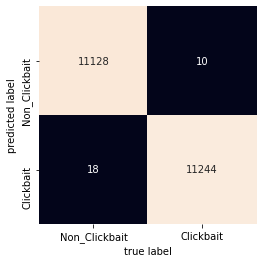

In [170]:
# Confusion matrix for training data
mat = confusion_matrix(Ytrain3, svm.predict(Xtrain3))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Non_Clickbait", "Clickbait"], yticklabels=["Non_Clickbait", "Clickbait"])
plt.xlabel('true label')
plt.ylabel('predicted label')

# Validation with scraped data

In [171]:
validation_data = pd.read_csv('Tests.txt', delimiter = "\n",encoding= 'unicode_escape', header=None)
validation_data

0
0   Field Marshal Sam Manekshaw Biopic, Starring V...
1   After Alia Bhatt tests positive for Covid-19, ...
2   Kareena Kapoor Khan Gets Nursery Designed with...
3   Pakistani actress Saba Qamar calls off wedding...
4   Sulthan Leaked Online, Full HD Available For F...
..                                                ...
65  Akanksha Puri, Mika Singh Spark Wedding Rumour...
66  Kirron Kher on way to recovery from blood ca...
67  He Cheated On Me: Somy Ali On Why She And Salm...
68  Eijaz Khan is 'fed up' of being confused for A...
69  Madhuri Dixit and Farah Khan enjoy their respe...

[70 rows x 1 columns]

In [172]:
validation_data = pd.read_csv('validation_data.csv')
validation_data

Unnamed: 0  ...         Target
0            0  ...      clickbait
1            1  ...      clickbait
2            2  ...      clickbait
3            3  ...      clickbait
4            4  ...      clickbait
..         ...  ...            ...
95          95  ...  non_clickbait
96          96  ...  non_clickbait
97          97  ...  non_clickbait
98          98  ...  non_clickbait
99          99  ...  non_clickbait

[100 rows x 3 columns]

In [173]:
validation_data["Text_Data"]= validation_data["Text_Data"].str.lower()
validation_data.head()

Unnamed: 0                                          Text_Data     Target
0           0  covid-19 second wave: akshay kumar, govinda to...  clickbait
1           1  kangana ranaut shares an edited video of karan...  clickbait
2           2  veteran actress shashikala, best known for gum...  clickbait
3           3  kapil sharma reveals the name of his son after...  clickbait
4           4  covid-19 second wave | here's a list of indian...  clickbait

In [174]:
validation_data["Target"].replace(["clickbait", "non_clickbait"] , [1,0], inplace = True)

In [175]:
validation_data.head()

Unnamed: 0                                          Text_Data  Target
0           0  covid-19 second wave: akshay kumar, govinda to...       1
1           1  kangana ranaut shares an edited video of karan...       1
2           2  veteran actress shashikala, best known for gum...       1
3           3  kapil sharma reveals the name of his son after...       1
4           4  covid-19 second wave | here's a list of indian...       1

Text(90.77375, 0.5, 'predicted label')

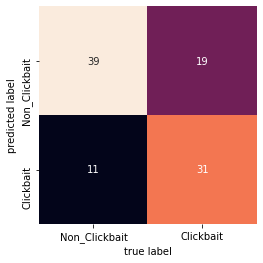

In [176]:
validate = svm.predict(validation_data["Text_Data"])
mat = confusion_matrix(validation_data["Target"], validate)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Non_Clickbait", "Clickbait"], yticklabels=["Non_Clickbait", "Clickbait"])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [177]:
accuracy_score(validation_data["Target"], validate)

0.7

# Conclusion

Through this project, significant efforts were put into classifying headlines of online news articles into clickbait and non-clickbait. 

Exploration process was carried out to clean and understand the dataset at hand. 

The nature of clickbait and non-clickbait titles were extensively explored by doing Feature Extraction process and the efficacy of each of the features uncovered were tested by using appropriate Statistical methods. 

Further, bag of words method was used to vectorize the data in two ways - Count vectorization and TF-IDF vectorization. 

Each of the prepared datasets were used to build several classification models. For each model built, corresponding confusion matrices, accuracy scores, ROC curves and other metrics were recorded and studied. 

The best testing accuracy was with SVM although Multinomial Naive Bayes also performed exceedingly well. Bag of Words approach was determined to be the best one. 

A custom validation dataset was built using GNewsClient API and the accuracy came out to be 70%. 